In [59]:
## 1. Load data
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

all_epidermis_lengths_in_microns = pd.read_csv('../data/all_epidermis_lengths_in_microns.csv')
all_dermis_lengths_in_microns = pd.read_csv('../data/all_dermis_lengths_in_microns.csv')

In [60]:
## 1a. drop the first columns of each dataframe
all_epidermis_lengths_in_microns.head(5)

for column in all_epidermis_lengths_in_microns.columns.values.tolist():
    print(column)

all_epidermis_lengths_in_microns.drop('Unnamed: 0', axis=1, inplace=True)
all_dermis_lengths_in_microns.drop('Unnamed: 0', axis=1, inplace=True)

Unnamed: 0
Animal_A.tifdiff_vec.txt
Animal_B.tiffdiff_vec.txt
Animal_C.tifdiff_vec.txt
Animal_D.tifdiff_vec.txt
Animal_E.tifdiff_vec.txt
Animal_F.tifdiff_vec.txt
Animal_G.tifdiff_vec.txt
Animal_H.tifdiff_vec.txt
Animal_I.tifdiff_vec.txt
Animal_J.tifdiff_vec.txt
Animal_K.tifdiff_vec.txt
Animal_L.tifdiff_vec.txt
Animal_M.tifdiff_vec.txt
Animal_N.tifdiff_vec.txt
Animal_O.tifdiff_vec.txt
Animal_P.tiffdiff_vec.txt
Animal_R.tiffdiff_vec.txt
Animal_U.tifdiff_vec.txt
Animal_V.tifdiff_vec.txt
Animal_W.tifdiff_vec.txt
Animal_X.tifdiff_vec.txt
Animal_Y.tifdiff_vec.txt
Animal_Z.tifdiff_vec.txt
Animal_Z1.tifdiff_vec.txt
Animal_Z10.tiffdiff_vec.txt
Animal_Z2.tifdiff_vec.txt
Animal_Z4.tifdiff_vec.txt
Animal_Z6.tiffdiff_vec.txt
Animal_Z8.tiffdiff_vec.txt
Animal_Z9.tiffdiff_vec.txt


In [61]:
all_epidermis_lengths_in_microns.head(5)

,Animal_A.tifdiff_vec.txt,Animal_B.tiffdiff_vec.txt,Animal_C.tifdiff_vec.txt,Animal_D.tifdiff_vec.txt,Animal_E.tifdiff_vec.txt,Animal_F.tifdiff_vec.txt,Animal_G.tifdiff_vec.txt,Animal_H.tifdiff_vec.txt,Animal_I.tifdiff_vec.txt,Animal_J.tifdiff_vec.txt,...,Animal_X.tifdiff_vec.txt,Animal_Y.tifdiff_vec.txt,Animal_Z.tifdiff_vec.txt,Animal_Z1.tifdiff_vec.txt,Animal_Z10.tiffdiff_vec.txt,Animal_Z2.tifdiff_vec.txt,Animal_Z4.tifdiff_vec.txt,Animal_Z6.tiffdiff_vec.txt,Animal_Z8.tiffdiff_vec.txt,Animal_Z9.tiffdiff_vec.txt
0,53.90,2.20,22.00,3.3,10.56,50.38,4.84,5.28,3.96,6.38,...,20.90,12.10,5.06,11.66,18.26,12.32,6.16,9.90,40.7,9.24
1,53.90,2.20,21.78,3.3,10.34,50.38,4.84,5.28,3.96,6.60,...,20.90,11.88,4.62,11.44,18.26,12.76,6.16,9.68,40.7,9.24
2,53.90,2.20,21.78,3.3,10.12,50.38,4.84,5.06,3.30,6.82,...,21.12,12.54,4.40,11.66,18.26,12.98,6.16,9.68,40.7,9.24
3,53.90,2.20,21.56,3.3,9.90,50.38,4.84,5.06,3.30,6.82,...,21.12,12.32,4.40,11.88,18.26,13.42,6.16,9.46,40.7,9.24
4,53.68,2.42,21.56,3.3,9.90,50.38,4.84,4.84,3.30,6.82,...,22.00,12.10,4.40,11.88,18.26,13.64,6.16,9.46,40.7,9.24


In [62]:
all_dermis_lengths_in_microns.head(5)

,Animal_A.tifdiff_vec2.txt,Animal_B.tiffdiff_vec2.txt,Animal_C.tifdiff_vec2.txt,Animal_D.tifdiff_vec2.txt,Animal_E.tifdiff_vec2.txt,Animal_F.tifdiff_vec2.txt,Animal_G.tifdiff_vec2.txt,Animal_H.tifdiff_vec2.txt,Animal_I.tifdiff_vec2.txt,Animal_J.tifdiff_vec2.txt,...,Animal_X.tifdiff_vec2.txt,Animal_Y.tifdiff_vec2.txt,Animal_Z.tifdiff_vec2.txt,Animal_Z1.tifdiff_vec2.txt,Animal_Z10.tiffdiff_vec2.txt,Animal_Z2.tifdiff_vec2.txt,Animal_Z4.tifdiff_vec2.txt,Animal_Z6.tiffdiff_vec2.txt,Animal_Z8.tiffdiff_vec2.txt,Animal_Z9.tiffdiff_vec2.txt
0,144.32,4.40,23.98,45.10,0.44,130.68,30.58,29.48,122.32,26.40,...,68.64,245.74,25.52,29.04,43.12,27.94,52.8,39.16,29.70,33.88
1,144.32,8.80,39.60,44.88,0.44,130.68,30.58,29.48,122.10,26.62,...,68.42,245.96,26.18,29.26,43.12,27.94,52.8,39.16,29.92,33.66
2,144.32,8.80,26.62,44.66,0.44,130.68,30.58,29.48,122.10,25.08,...,68.20,245.96,26.84,30.14,43.12,27.94,52.8,39.16,30.14,33.44
3,144.32,8.80,27.28,44.44,30.36,130.68,30.36,29.26,122.10,25.08,...,67.98,246.18,27.50,30.14,43.12,27.94,52.8,39.16,30.36,33.22
4,144.32,9.02,39.82,44.44,30.58,130.68,29.92,29.48,122.10,25.08,...,66.44,246.40,30.14,30.58,43.12,27.94,52.8,39.16,30.58,33.00


In [63]:
## 2. Test obtaining values in a column
type(all_epidermis_lengths_in_microns.columns.values)

(all_epidermis_lengths_in_microns.columns.values)[1]

# recall python uses 0 indexing unlike R
i = 0
df = all_epidermis_lengths_in_microns

this_column_name = (df.columns.values)[i]

df[this_column_name][0]

type(df[this_column_name])

type(np.array(df[this_column_name]))

numpy.ndarray

In [52]:
test_array = (np.array(df[this_column_name]))
              
test_array[0]

test_empty_array = []
print(test_empty_array)

[]


In [85]:
## 3. Write for loop to cycle through columns and return indices of peaks 
# for epidermis
df = all_epidermis_lengths_in_microns

# make empty list to store peak indices
epidermis_peak_indices = []

for index in range(len(df.columns.values)):
    # get the data in a given volumn index
    this_column_name = df.columns.values[index]
    this_column_data = df[this_column_name]
    
    # call peak function and store result; use '_' to remove empty dictionary from returned array
    result,_ = find_peaks(this_column_data)
    epidermis_peak_indices.append(result)
    
#for dermis 
df = all_dermis_lengths_in_microns

# make empty list to store peak indices
dermis_peak_indices = []

for index in range(len(df.columns.values)):
    # get the data in a given volumn index
    this_column_name = df.columns.values[index]
    this_column_data = df[this_column_name]
    
    # call peak function and store result
    result, _ = find_peaks(this_column_data)
    dermis_peak_indices.append(result)

In [86]:
print(dermis_peak_indices[0:4])

[array([ 152,  202,  209,  220,  277,  400,  411,  471,  523,  587,  680,
        860,  916,  992, 1004, 1029, 1037, 1097, 1149, 1174, 1179, 1191,
       1365, 1372, 1386, 1394, 1525, 1599, 1662, 1670, 1684, 1764, 1788,
       1791, 1797, 1800, 1811, 1858, 1863, 1867, 1872, 1880, 1957, 2031,
       2040, 2049, 2055, 2076, 2121, 2132, 2136, 2151, 2154, 2157, 2217,
       2288, 2292]), array([ 11,  17,  38,  79, 102, 107, 114, 118, 123, 162, 170, 173, 176,
       187, 194, 196, 212, 224, 269, 298, 382, 388, 462, 465, 477, 481,
       513, 517, 531, 553, 569, 572, 593, 597, 599, 612, 621, 647, 650,
       652, 661, 663, 667, 673, 697, 731, 757, 773, 800, 802, 805, 820,
       829, 839, 845, 855, 877, 894, 913, 916, 918]), array([   1,   17,   63,  120,  179,  226,  236,  240,  242,  244,  247,
        251,  253,  255,  257,  262,  264,  282,  288,  292,  295,  299,
        317,  324,  326,  333,  343,  345,  365,  368,  373,  390,  403,
        407,  410,  454,  468,  472,  567,  605,  61

In [90]:
print(epidermis_peak_indices[0:4])


[array([  32,   45,   52,   97,  122,  182,  231,  235,  251,  307,  399,
        433,  472,  477,  485,  491,  557,  630,  657,  664,  668,  682,
        693,  842,  884,  907,  965, 1021, 1044, 1099, 1180, 1194, 1204,
       1303, 1408, 1457, 1511, 1541, 1544, 1547, 1572, 1641, 1706, 1766,
       1792, 1838, 1924, 1972, 1986, 1991, 2021, 2027, 2033, 2042, 2049,
       2056, 2063, 2066, 2102, 2105, 2112, 2270]), array([ 19,  33,  45,  51,  56,  89,  96, 100, 110, 136, 181, 189, 201,
       232, 237, 251, 274, 308, 312, 330, 334, 337, 357, 368, 398, 401,
       404, 415, 417, 420, 429, 440, 449, 476, 481, 517, 527, 537, 571,
       580, 589, 602, 618, 623, 629, 636, 656, 660, 678, 709, 721, 742,
       763, 774, 779, 784, 808, 812, 814, 816, 822, 837, 849, 853, 856,
       862, 881, 883, 885, 887, 889, 892, 897, 900, 904, 925]), array([  38,   43,   82,   94,   99,  109,  140,  194,  230,  235,  241,
        249,  253,  272,  281,  297,  302,  315,  320,  327,  339,  364,
        371, 

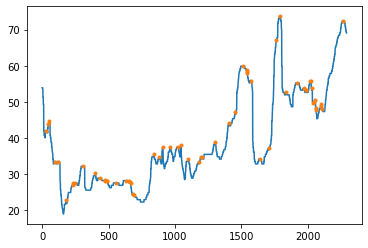

In [95]:
## 3a plot example of peaks for epidermis, animal A
Animal_A_epidermis_lengths = all_epidermis_lengths_in_microns[all_epidermis_lengths_in_microns.columns.values[0]]
Animal_A_epidermis_peak_indices = epidermis_peak_indices[0]

plt.plot(Animal_A_epidermis_lengths)
plt.plot(Animal_A_epidermis_peak_indices, Animal_A_epidermis_lengths[Animal_A_epidermis_peak_indices], ".")
plt.show()


#4. Write for loop to cycle through columns and return width of peaks 


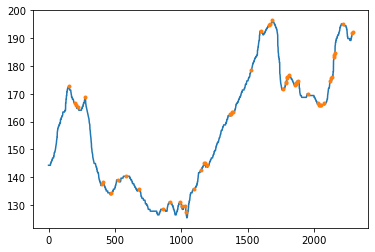

In [96]:
## 3b plot example of peaks for dermis, animal A
Animal_A_dermis_lengths = all_dermis_lengths_in_microns[all_dermis_lengths_in_microns.columns.values[0]]
Animal_A_dermis_peak_indices = dermis_peak_indices[0]

plt.plot(Animal_A_dermis_lengths)
plt.plot(Animal_A_dermis_peak_indices, Animal_A_dermis_lengths[Animal_A_dermis_peak_indices], ".")
plt.show()

In [97]:
Animal_A_dermis_lengths

0       144.32
1       144.32
2       144.32
3       144.32
4       144.32
         ...  
6392       NaN
6393       NaN
6394       NaN
6395       NaN
6396       NaN
Name: Animal_A.tifdiff_vec2.txt, Length: 6397, dtype: float64